In [1]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 감성사전 - Afinn

In [6]:
pos_review=(glob.glob("data\\aclimdb\\train\\pos\\*.txt"))[20]

In [7]:
f = open(pos_review, 'r')
lines1 = f.readlines()[0]
f.close()

In [36]:
lines1

'This Night Listener is better than people are generally saying. It has weaknesses, and it seems to be having a genre identity crisis, no doubt, but I think its creepy atmosphere and intriguing performances make up for this. The whole thing feels like one of those fireside "this happened to a friend of a friend of mine" ghost stories. One big complaint about the movie is the pacing: but the slow and sometimes awkward pacing is deliberate. Everything that unfolds in this movie is kept well within the realm of possibility, and real life just sort of plods along혰no? So there are no flashy endings or earth-shattering revelations, no "showdown" scenes. Thank Heaven. You have to get into the zone when watching this movie, forget your reservations and your expectations of what makes a (conventionally)good movie. Williams isn\'t terrific, but he easily meets the needs of the story, plus his character is supposed to be somewhat generic ("No One") as he is the Everyman, the avatar by which we ou

In [8]:
afinn = Afinn()

In [10]:
afinn.score(lines1) # -15 ~ 20

8.0

In [11]:
neg_review=(glob.glob("data\\aclimdb\\train\\neg\\*.txt"))[20]

In [12]:
f = open(neg_review, 'r')
lines2 = f.readlines()[0]
f.close()

In [68]:
lines2

"The characters are unlikeable and the script is awful. It's a waste of the talents of Deneuve and Auteuil."

In [14]:
afinn.score(lines2)

-4.0

In [ ]:
# 감성사전 - NRC

In [23]:
NRC=pd.read_csv('data\\nrc.txt',engine="python",header=None,sep="\t")
NRC.head(20)

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0
5,aback,negative,0
6,aback,positive,0
7,aback,sadness,0
8,aback,surprise,0
9,aback,trust,0


In [25]:
NRC.iloc[:,1].value_counts()

anger           14182
negative        14182
sadness         14182
fear            14182
trust           14182
positive        14182
surprise        14182
joy             14182
anticipation    14182
disgust         14182
Name: 1, dtype: int64

In [26]:
NRC = NRC[(NRC != 0).all(1)]

In [27]:
NRC[:10]

,0,1,2
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1
33,abandoned,fear,1
35,abandoned,negative,1
37,abandoned,sadness,1
40,abandonment,anger,1
43,abandonment,fear,1


In [28]:
NRC[NRC[0] == 'happy']

,0,1,2
57871,happy,anticipation,1
57874,happy,joy,1
57876,happy,positive,1
57879,happy,trust,1


In [29]:
NRC[NRC[0] == 'disaster']

,0,1,2
36260,disaster,anger,1
36262,disaster,disgust,1
36263,disaster,fear,1
36265,disaster,negative,1
36267,disaster,sadness,1
36268,disaster,surprise,1


In [30]:
NRC=NRC.reset_index(drop=True)

In [31]:
tokenizer = RegexpTokenizer('[\w]+')

In [32]:
stop_words = stopwords.words('english')


In [33]:
p_stemmer = PorterStemmer()


In [34]:
raw = lines1.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

In [35]:
match_words = [x for x in stopped_tokens if x in list(NRC[0])]


In [150]:
match_words

['crisis',
 'doubt',
 'friend',
 'friend',
 'ghost',
 'complaint',
 'deliberate',
 'possibility',
 'real',
 'forget',
 'good',
 'terrific',
 'avatar',
 'shot',
 'content',
 'top',
 'coming']

In [151]:
# emotion=[]
# for i in match_words:
#     temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
#     for j in temp:
#         emotion.append(j)

In [47]:
# emotion1 = []
# temp = NRC[NRC[0] == 'doubt'][1].values
# for j in list(temp):
#     emotion1.append(j)
# emotion1

In [58]:
emotion = []
for i in match_words:
    temp = NRC[NRC[0] == i][1].values
    for j in list(temp):
        emotion.append(j)
emotion

['negative',
 'fear',
 'negative',
 'sadness',
 'trust',
 'joy',
 'positive',
 'trust',
 'joy',
 'positive',
 'trust',
 'fear',
 'anger',
 'negative',
 'positive',
 'anticipation',
 'positive',
 'trust',
 'negative',
 'anticipation',
 'joy',
 'positive',
 'surprise',
 'trust',
 'sadness',
 'positive',
 'anger',
 'fear',
 'negative',
 'sadness',
 'surprise',
 'joy',
 'positive',
 'trust',
 'anticipation',
 'positive',
 'trust',
 'anticipation']

In [51]:
sentiment_result1=pd.Series(emotion).value_counts()
sentiment_result1

positive        8
trust           7
negative        5
joy             4
anticipation    4
sadness         3
fear            3
anger           2
surprise        2
dtype: int64

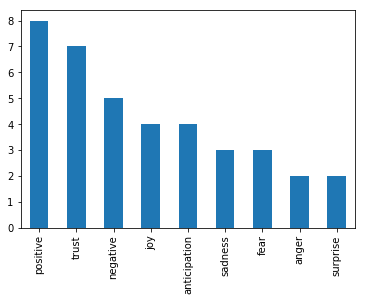

In [52]:
sentiment_result1.plot.bar()


In [61]:
def emotion_score(s1):

# 감정점수를 계산하는 함수 작성

    emot_score = 0
    for j in s1:
        if j in  ('positive','anticipation','trust','joy','surprise'):
            emot_score += 1
        else:
            emot_score -= 1
    return emot_score

In [62]:
emotion_score(emotion)

12

In [231]:
# emotion_score(('positive', 'anticipation','trust','joy','surprise'))

5

In [69]:
raw = lines2.lower()
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words]

In [70]:
match_words = [x for x in stopped_tokens if x in list(NRC[0])]


In [234]:
# emotion=[]
# for i in match_words:
#     temp=list(NRC.iloc[np.where(NRC[0] == i)[0],1])
#     for j in temp:
#         emotion.append(j)

In [71]:
emotion1 = []
for i in match_words:
    temp = NRC[NRC[0] == i][1].values
    for j in list(temp):
        emotion1.append(j)
emotion1

['positive',
 'anger',
 'disgust',
 'fear',
 'negative',
 'sadness',
 'disgust',
 'negative']

In [72]:
emotion_score(emotion1)

-6

In [73]:
sentiment_result2=pd.Series(emotion1).value_counts()
sentiment_result2

negative    2
disgust     2
positive    1
anger       1
fear        1
sadness     1
dtype: int64

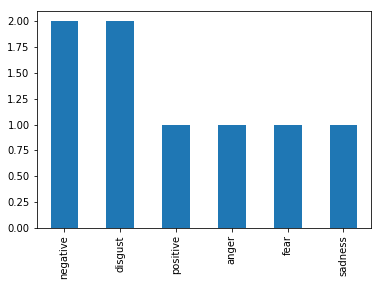

In [74]:
sentiment_result2.plot.bar()


In [238]:
emotionf(emotion1)

-6

In [ ]:
# machine learning

In [75]:
import pandas as pd
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
pos_review=(glob.glob("data\\aclimdb\\train\\pos\\*.txt"))[:20]

In [380]:
# f = open(pos_review, 'r')
# pos_review = f.readlines()[0]
# f.close()

In [77]:
lines_pos=[]
for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except Exception as e:
        continue

In [79]:
len(lines_pos)

20

In [81]:
# lines_pos

In [279]:
# f = open(pos_review, 'r')
# pos_lines = f.readlines()[0]
# f.close()

In [89]:
neg_review=(glob.glob("data\\aclimdb\\train\\neg\\*.txt"))[:20]

In [90]:
# f = open(neg_review, 'r')
# neg_review = f.readlines()[0]
# f.close()

In [91]:

lines_neg=[]
for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue

In [92]:
len(lines_neg)

20

In [93]:
total_text = lines_neg + lines_pos

In [94]:
total_text

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son.

In [391]:
len(total_text)

40

In [396]:
total_text[25]

"This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.<br /><br />All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.<br /><br />It rates a 7.7/10 from...<br />

In [308]:
# x = np.array(["pos", "neg"])
# class_Index = np.repeat(x, [len(lines_pos), len(lines_neg)], axis=0)

In [96]:
neg_index = np.repeat('neg', 20)
neg_index = list(neg_index)

In [98]:
# neg_index

In [101]:
 pos_index = np.repeat('pos', 20)
pos_index = list(pos_index)

In [103]:
# pos_index

In [104]:
class_index = neg_index + pos_index

In [105]:
print(class_index)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']


In [106]:
stop_words = stopwords.words('english')

In [108]:
vect = TfidfVectorizer(stop_words=stop_words).fit(total_text)

In [109]:
# df(document frequency) - 전체 문서에서 특정 단어를 포함하는 문서의 빈도
# tf(term frequency) - 특정 단어가 하나의 문서에서 나타난 빈도
# tfidf - tf/df

In [110]:
X_train_vectorized = vect.transform(total_text)

In [115]:
# X_train_vectorized = vect.transform(total_text)

# X_train_vectorized.index = class_Index
import pandas as pd
pd.DataFrame(X_train_vectorized.toarray(), columns = vect.get_feature_names()).head()

,06,10,108,14,17,1940,1950,1959,1970,1972,...,year,years,yes,yet,york,yorker,young,youth,youthful,zsigmond
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.136298
1,0.0,0.0,0.074836,0.0,0.0,0.0,0.0,0.0,0.037418,0.037418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143903,0.000000
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [117]:
# Logistic 예측모델 작성
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
logmodel = LogisticRegression()
logmodel.fit(X_train_vectorized, class_index)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
pos_review_test=(glob.glob("data\\aclimdb\\train\\pos\\*.txt"))[51]

In [119]:
test = []
f = open(pos_review_test, 'r')
test.append(f.readlines()[0])
f.close()

In [120]:
prediction = logmodel.predict(vect.transform(test))
prediction

array(['pos'], dtype='<U3')

In [121]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vectorized, class_index)
pred = tree_model.predict(vect.transform(test))
pred

array(['pos'], dtype='<U3')